<a href="https://colab.research.google.com/github/saransarvesh/ALY-6110/blob/main/Boston%20Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [ ]:
from google.colab import files
upload = files.upload()

Saving B.csv to B.csv


In [ ]:
#1. READ THE DATASET
dataset = spark.read.csv('B.csv', inferSchema=True, header = True)

In [ ]:
#2. SHOW FIRST 5 ELEMENTS
dataset.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
#3. COUNT THE NUMBER OF OBSERVATION
row = dataset.count()
row

506

In [ ]:
# 4. SCHEMA OF DATASET
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
#5. DROP COLUMN B
db = dataset.drop('b')

In [ ]:
db.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+-----+----+
only showing top 5 rows



In [ ]:
# 6. ROUND ALL OF THE NUMERICAL COLUMNS
from pyspark.sql.functions import round, col
for c in db.columns:
    db = db.withColumn(c, round(c, 2))

In [ ]:
db.show(3)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+
only showing top 3 rows



In [ ]:
#7. 10% INCREASE OF AGE COLUMN
import pyspark.sql.functions as F
db_new = db.withColumn("age10", 1.1*F.col( "age"))

In [ ]:
db_new.show(3)

+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----------------+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|lstat|medv|            age10|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----------------+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 4.98|24.0|71.72000000000001|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 9.14|21.6|            86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8| 4.03|34.7|67.21000000000001|
+----+----+-----+----+----+----+----+----+---+---+-------+-----+----+-----------------+
only showing top 3 rows



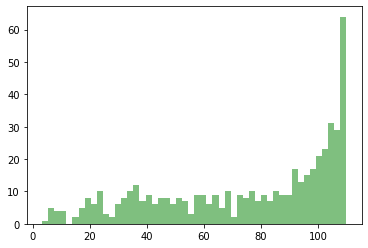

In [ ]:
##8. 2D plot of age10
import matplotlib.pyplot as plt
dbz =db_new.toPandas()
num_bins = 50
n, bins, patches = plt.hist(dbz.age10, num_bins, facecolor='green', alpha=0.5)

In [ ]:
#ROUNDING OF THE COLUMN
from pyspark.sql.functions import round, col
for c in db_new.columns:
    db_new = db_new.withColumn(c, round(c, 2))

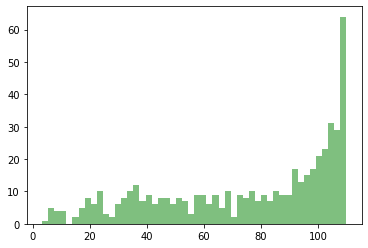

In [ ]:
#8. 2D plot of age10
import matplotlib.pyplot as plt
dbz =db_new.toPandas()
num_bins = 50
n, bins, patches = plt.hist(dbz.age10, num_bins, facecolor='green', alpha=0.5)

In [ ]:
#9. TO SHOW SUMMARY STATISTICS
db_new.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [ ]:
#9. Convert to pandas
dbz =db_new.toPandas()
print(dbz)

     crim    zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  \
0    0.01  18.0   2.31     0  0.54  6.58  65.2  4.09    1  296     15.3   
1    0.03   0.0   7.07     0  0.47  6.42  78.9  4.97    2  242     17.8   
2    0.03   0.0   7.07     0  0.47  7.19  61.1  4.97    2  242     17.8   
3    0.03   0.0   2.18     0  0.46  7.00  45.8  6.06    3  222     18.7   
4    0.07   0.0   2.18     0  0.46  7.15  54.2  6.06    3  222     18.7   
..    ...   ...    ...   ...   ...   ...   ...   ...  ...  ...      ...   
501  0.06   0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   
502  0.05   0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   
503  0.06   0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   
504  0.11   0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   
505  0.05   0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   

     lstat  medv   age10  
0     4.98  24.0   71.72  
1     9.14  21.6   86.79  
2     4.03  34.7  

In [ ]:
#10. View last rows in Pandas
dbz.tail(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,age10
501,0.06,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,9.67,22.4,76.01
502,0.05,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,9.08,20.6,84.37
503,0.06,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,5.64,23.9,100.10
504,0.11,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,6.48,22.0,98.23
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,7.88,11.9,88.88
